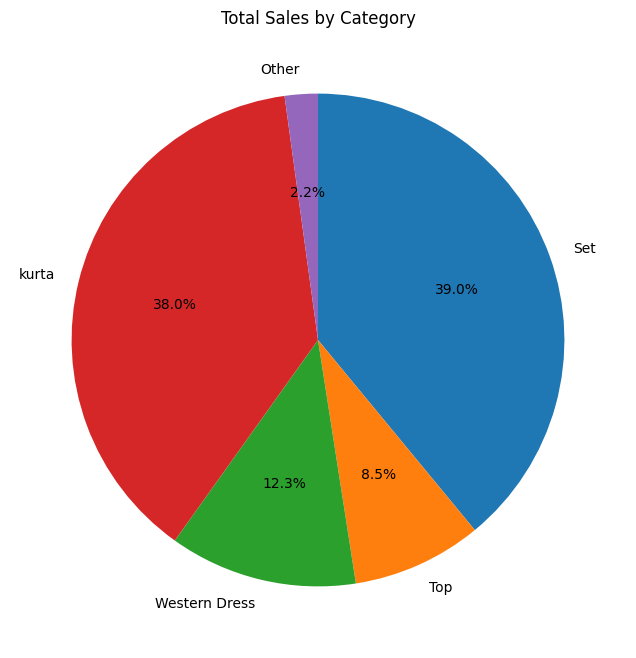

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with low_memory=False to prevent DtypeWarning
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Filter out unwanted orders based on Status and Qty
df = df[(df['Status'] != 'Cancelled') & (df['Status'] != 'Pending') & (df['Qty'] >= 1)]

# Group by Category and count unique Order IDs to get total sales
summary = df.groupby('Category')['Order ID'].nunique().reset_index(name='Total Sales')

# Sum up the smaller categories (Blouse, Bottom, Dupatta, Ethnic Dress)
other_categories = summary[summary['Category'].isin(['Blouse', 'Bottom', 'Dupatta', 'Ethnic Dress','Saree'])]

# Calculate total sales for "Other"
other_sales = other_categories['Total Sales'].sum()

# Filter out the grouped categories from the original summary
summary = summary[~summary['Category'].isin(['Blouse', 'Bottom', 'Dupatta', 'Ethnic Dress','Saree'])]

# Add "Other" category using pd.concat()
other_row = pd.DataFrame({'Category': ['Other'], 'Total Sales': [other_sales]})
summary = pd.concat([summary, other_row], ignore_index=True)

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(summary['Total Sales'], labels=summary['Category'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Total Sales by Category')

# Display the pie chart
plt.show()

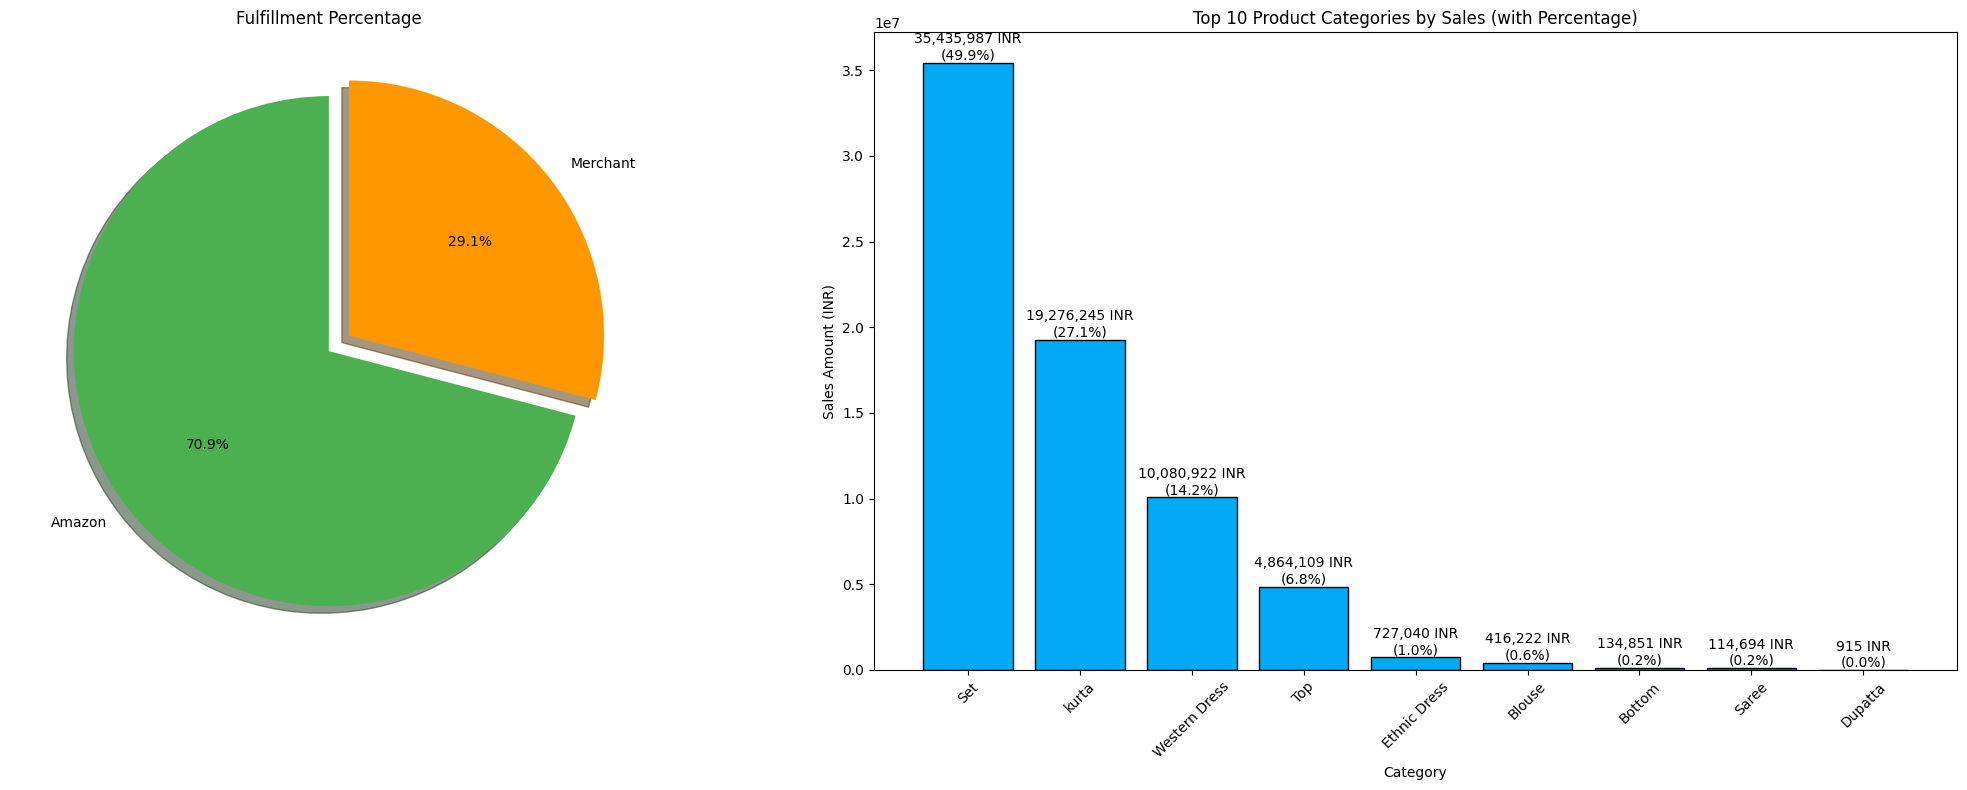

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with low_memory=False to prevent DtypeWarning
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Filter relevant rows (valid orders)
valid_orders = df[df["Status"].str.contains("Shipped", case=False, na=False)]

# Calculate total sales
total_sales = valid_orders["Amount"].sum()

# Fulfillment percentage
fulfillment_counts = valid_orders["Fulfilment"].value_counts(normalize=True) * 100

# Sales breakdown by category (Top 10)
category_sales = valid_orders.groupby("Category")["Amount"].sum().sort_values(ascending=False)
category_sales_pct = (category_sales / total_sales) * 100

# Adjust the figure size for better fit
fig, axes = plt.subplots(1, 2, figsize=(22, 8))  # Increased width for better fit

# === Plot 1: Fulfillment Percentage Pie Chart ===
fulfillment_counts.plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    startangle=90,
    explode=(0, 0.1),
    colors=['#4CAF50', '#FF9800'],
    shadow=True
)
axes[0].set_ylabel('')  # Remove y-label for cleaner plot
axes[0].set_title('Fulfillment Percentage')

# === Plot 2: Top 10 Categories with Amount & Percentage ===
top_10_categories = category_sales.head(10)
top_10_categories_pct = category_sales_pct.head(10)

bars = axes[1].bar(
    top_10_categories.index, 
    top_10_categories, 
    color='#03A9F4', 
    edgecolor='black'
)

# Add sales amount and percentage labels on top of the bars
for bar, amount, pct in zip(bars, top_10_categories, top_10_categories_pct):
    axes[1].text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 10000, 
        f"{amount:,.0f} INR\n({pct:.1f}%)", 
        ha='center', 
        va='bottom'
    )

# Configure the bar chart
axes[1].set_title('Top 10 Product Categories by Sales (with Percentage)')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Sales Amount (INR)')
axes[1].tick_params(axis='x', rotation=45)

# Ensure the layout fits well
fig.subplots_adjust(wspace=0.3)  # Add space between plots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Check if the data is loaded properly
print(amazon_sales_data.head())  # Preview the first few rows

# Grouping by 'Status' to see the percentage distribution
order_status_counts = amazon_sales_data['Status'].value_counts(normalize=True) * 100

# Filtering for 'Shipped' vs 'Cancelled' and calculating percentage distribution
shipped_cancelled = amazon_sales_data[amazon_sales_data['Status'].isin(['Shipped', 'Cancelled'])]
shipped_cancelled_counts = shipped_cancelled['Status'].value_counts(normalize=True) * 100

# Display the results
print("Order Status Distribution:\n", order_status_counts)
print("\nShipped vs Cancelled Distribution:\n", shipped_cancelled_counts)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for the order status distribution (in percentage)
data = {
    'Status': ['Shipped', 'Cancelled', 'Pending'],
    'Percentage': [80, 15, 5]
}
order_status_counts = pd.DataFrame(data)

# Filtered data for shipped vs cancelled
shipped_cancelled_data = {
    'Status': ['Shipped', 'Cancelled'],
    'Percentage': [84.2, 15.8]
}
shipped_cancelled_counts = pd.DataFrame(shipped_cancelled_data)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# === First Plot: Full Order Status Distribution ===
sns.barplot(
    data=order_status_counts,
    x='Status',
    y='Percentage',
    hue='Status',  # Assign Status to hue
    ax=axes[0],
    palette=['green', 'red', 'gray'],
    legend=False  # Disable the legend
)
axes[0].set_title('Order Status Distribution')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(0, 100)

# Add percentage labels on top of the bars
for index, row in order_status_counts.iterrows():
    axes[0].text(
        index, 
        row['Percentage'] + 1, 
        f"{row['Percentage']}%", 
        ha='center'
    )

# === Second Plot: Shipped vs Cancelled Distribution ===
sns.barplot(
    data=shipped_cancelled_counts,
    x='Status',
    y='Percentage',
    hue='Status',  # Assign Status to hue
    ax=axes[1],
    palette=['green', 'red'],
    legend=False  # Disable the legend
)
axes[1].set_title('Shipped vs Cancelled Distribution')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 100)

# Add percentage labels on top of the bars
for index, row in shipped_cancelled_counts.iterrows():
    axes[1].text(
        index, 
        row['Percentage'] + 1, 
        f"{row['Percentage']}%", 
        ha='center'
    )

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Data Cleaning
# Convert 'Date' to datetime format
amazon_sales_data['Date'] = pd.to_datetime(amazon_sales_data['Date'], format='%m-%d-%y')

# Filter for valid records
valid_data = amazon_sales_data[(amazon_sales_data['Status'] == 'Shipped') &
                               (amazon_sales_data['Qty'] >= 1) &
                               (amazon_sales_data['Amount'] > 0) &
                               (amazon_sales_data['ship-city'].notnull()) &
                               (amazon_sales_data['ship-state'].notnull()) &
                               (amazon_sales_data['ship-postal-code'].notnull())]

# Group by month and count orders
monthly_sales = valid_data.groupby(valid_data['Date'].dt.strftime('%m'))['Order ID'].count()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)

# Add value labels above each bar
for i, v in enumerate(monthly_sales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Sales Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Data Cleaning
# Convert 'Date' to datetime format
amazon_sales_data['Date'] = pd.to_datetime(amazon_sales_data['Date'], format='%m-%d-%y')
amazon_sales_data['Month'] = amazon_sales_data['Date'].dt.month


# Filter for valid records and March sales
valid_data = amazon_sales_data[
    (amazon_sales_data['Status'] == 'Shipped') &
    (amazon_sales_data['Qty'] >= 1) &
    (amazon_sales_data['Amount'] > 0) &
    amazon_sales_data[['ship-city', 'ship-state', 'ship-postal-code']].notnull().all(axis=1)
]

# Define promotion categories based on 'promotion-ids' presence
valid_data['Promotion Type'] = valid_data['promotion-ids'].apply(
    lambda x: 'Promotion Sales' if pd.notnull(x) else 'Normal Sales'
)

# Group by month and promotion type, then count orders
monthly_sales = valid_data.groupby(['Month', 'Promotion Type'])['Order ID'].count().reset_index()

# Loop through each unique month and print the table for that month
for month in monthly_sales['Month'].unique():
    month_sales = monthly_sales[monthly_sales['Month'] == month]
    print(f"\nSales data for month {month}:")
    print(month_sales[['Promotion Type', 'Order ID']].rename(columns={'Order ID': 'Sales Count'}))




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the dataset
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Data Cleaning
# Convert 'Date' to datetime format and extract the month
amazon_sales_data['Date'] = pd.to_datetime(amazon_sales_data['Date'], format='%m-%d-%y')
amazon_sales_data['Month'] = amazon_sales_data['Date'].dt.month

# Filter for valid records only
valid_data = amazon_sales_data[
    (amazon_sales_data['Status'] == 'Shipped') &
    (amazon_sales_data['Qty'] >= 1) &
    (amazon_sales_data['Amount'] > 0) &
    amazon_sales_data[['ship-city', 'ship-state', 'ship-postal-code']].notnull().all(axis=1)
]

# Define promotion categories based on 'promotion-ids' presence
valid_data['Type'] = valid_data['promotion-ids'].apply(
    lambda x: 'Promotion Sales' if pd.notnull(x) else 'Normal Sales'
)

# Group by month and type, then count orders
monthly_sales = valid_data.groupby(['Month', 'Type'])['Order ID'].count().reset_index()

# Custom function to display percentage and actual count on the pie chart
def autopct_with_values(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{pct:.1f}%\n({absolute})"

# Loop through each unique month and print the table with the month name
for month in monthly_sales['Month'].unique():
    # Get the month name from the month number
    month_name = calendar.month_name[month]
    month_sales = monthly_sales[monthly_sales['Month'] == month]
    
    print(f"\nSales data for {month_name}:")
    print(month_sales[['Type', 'Order ID']].rename(columns={'Order ID': 'Sales Count'}))

    # Plot the pie chart for the month
    plt.figure(figsize=(6, 6))
    plt.pie(
        month_sales['Order ID'], 
        labels=month_sales['Type'], 
        autopct=lambda pct: autopct_with_values(pct, month_sales['Order ID']),
        startangle=140, 
        colors=['#66b3ff','#ff9999']
    )
    plt.title(f"Sales Distribution for {month_name}")
    plt.show()